In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import pickle

In [2]:
df=pd.read_csv('fake_and_real_news.csv')

In [3]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [62]:
df['Text'][1]

'U.S. conservative leader optimistic of common ground on healthcare WASHINGTON (Reuters) - Republicans in the U.S. House of Representatives could achieve common ground on a deal to win support for healthcare legislation on Thursday, after President Donald Trump intervened in negotiations, a conservative leader said on Wednesday. “We’re not there yet, but we’re very optimistic that if we work around the clock between now and Noon tomorrow, that we’re going to be able to hopefully find some common ground,” Representative Mark Meadows, chairman of the conservative House Freedom Caucus, told reporters. Meadows’ group has opposed House Republican healthcare legislation up to now and threatened earlier in the day to block its passage in a Thursday vote.  '

In [5]:
df.duplicated().sum()

35

In [6]:
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape


(9865, 2)

In [9]:
df.isnull().sum()

Text     0
label    0
dtype: int64

In [10]:
df['label']=df['label'].map({'Fake':1,'Real':0})

In [11]:
df.head()

,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,1
1,U.S. conservative leader optimistic of common ...,0
2,"Trump proposes U.S. tax overhaul, stirs concer...",0
3,Court Forces Ohio To Allow Millions Of Illega...,1
4,Democrats say Trump agrees to work on immigrat...,0


## EDA

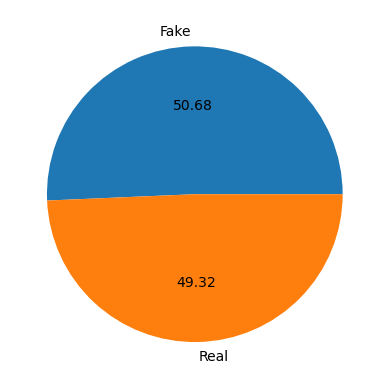

In [12]:
plt.pie(df['label'].value_counts(),autopct='%.2f',labels=['Fake','Real'])
plt.show()

In [13]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abdurehman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
df['num_character'] = df['Text'].apply(len)

In [15]:
df.head()

,Text,label,num_character
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,1,1545
1,U.S. conservative leader optimistic of common ...,0,758
2,"Trump proposes U.S. tax overhaul, stirs concer...",0,6157
3,Court Forces Ohio To Allow Millions Of Illega...,1,2269
4,Democrats say Trump agrees to work on immigrat...,0,3748


In [16]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [17]:
df['num_sentence'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [18]:
df.head()

,Text,label,num_character,num_words,num_sentence
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,1,1545,314,15
1,U.S. conservative leader optimistic of common ...,0,758,137,3
2,"Trump proposes U.S. tax overhaul, stirs concer...",0,6157,1131,41
3,Court Forces Ohio To Allow Millions Of Illega...,1,2269,403,8
4,Democrats say Trump agrees to work on immigrat...,0,3748,671,20


In [19]:
df[['num_character','num_words','num_sentence']].describe()

,num_character,num_words,num_sentence
count,9865.000000,9865.000000,9865.000000
mean,2585.662443,479.914445,15.694475
std,1395.128900,261.566942,10.412241
min,219.000000,42.000000,1.000000
25%,1895.000000,352.000000,9.000000
50%,2455.000000,454.000000,14.000000
75%,3198.000000,596.000000,20.000000
max,29849.000000,5988.000000,321.000000


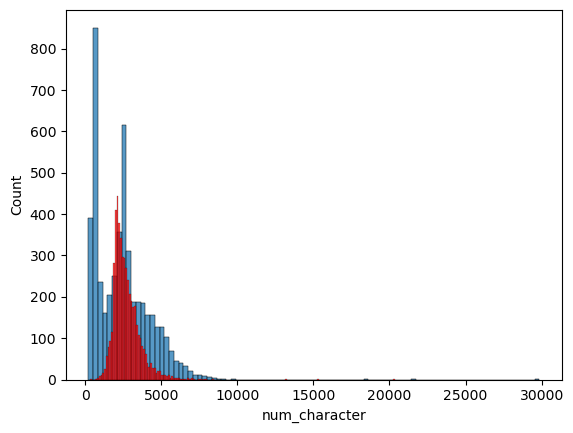

In [20]:
# for number of character
sns.histplot(df[df['label']==0]['num_character'])
sns.histplot(df[df['label']==1]['num_character'],color='red')
plt.show()

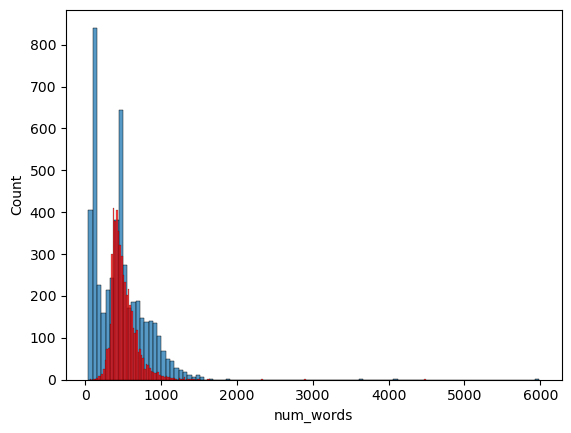

In [21]:
# for number of number of words
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'],color='red')
plt.show()

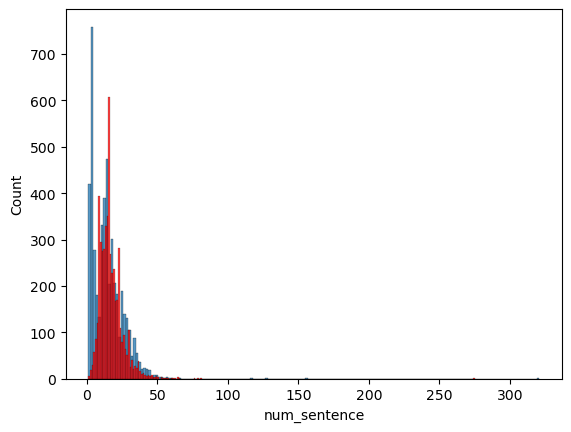

In [22]:
# for number of number of sentences
sns.histplot(df[df['label']==0]['num_sentence'])
sns.histplot(df[df['label']==1]['num_sentence'],color='red')
plt.show()

C:\Users\Abdurehman\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


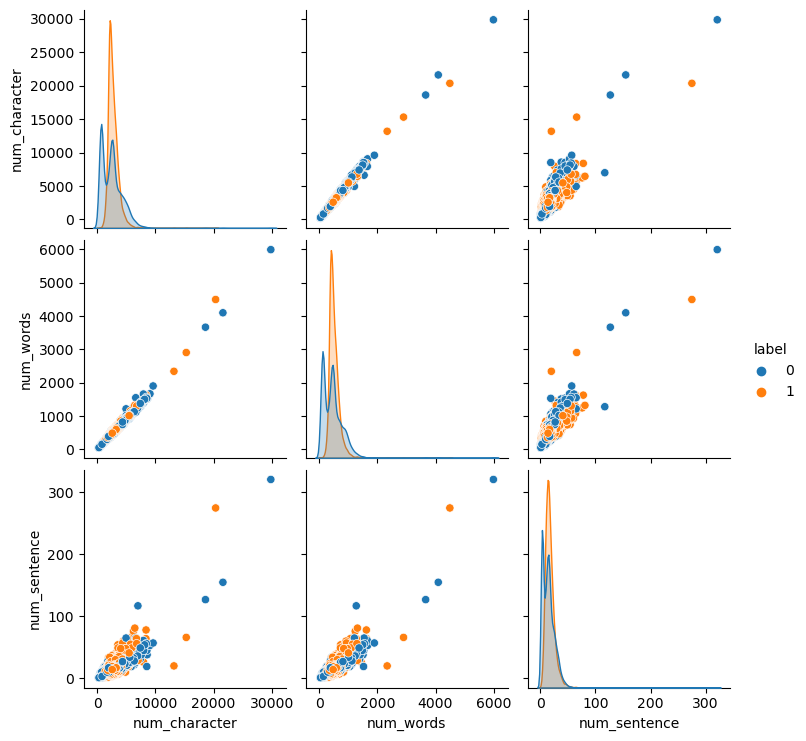

In [23]:
sns.pairplot(df,hue='label')
plt.show()

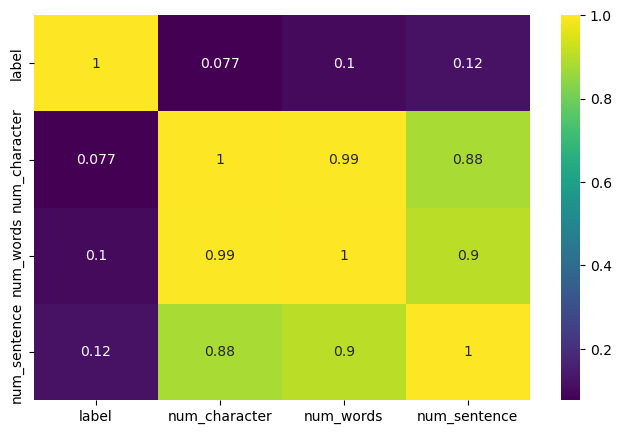

In [24]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='viridis')
plt.show()

## Data Preprocessing
- Lower case
- Tokenization
- Remove Special Characters
- Remove Stopwords
- Lemmatization

In [25]:
import nltk
import string
from nltk.corpus import stopwords, wordnet
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Abdurehman\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Abdurehman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Abdurehman\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Abdurehman\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [32]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('running',pos='v')

'run'

In [34]:
def get_wordnet_pos(tag):
    
    if tag.startswith('J'):  
        return wordnet.ADJ
    
    elif tag.startswith('V'): 
        return wordnet.VERB
    
    elif tag.startswith('N'): 
        return wordnet.NOUN
    
    elif tag.startswith('R'):  
        return wordnet.ADV
    
    else:
        return wordnet.NOUN 

In [35]:
def transform_text(text):
    text=text.lower()
    
    text=word_tokenize(text)

    text=[i for i in text if i.isalnum()]

    text=[i for i in text if i not in stopwords.words('english') and i not in string.punctuation]
    pos_tags=pos_tag(text) 
    text=[lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word,tag in pos_tags]

    return " ".join(text)

In [30]:
transform_text('I Am Going To School ')

'go school'

In [31]:
df['transformed_text']=df['Text'].apply(transform_text)

In [32]:
df.head()

,Text,label,num_character,num_words,num_sentence,transformed_text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,1,1545,314,15,top trump surrog brutal stab back pathet video...
1,U.S. conservative leader optimistic of common ...,0,758,137,3,conserv leader optimist common ground healthca...
2,"Trump proposes U.S. tax overhaul, stirs concer...",0,6157,1131,41,trump propos tax overhaul stir concern deficit...
3,Court Forces Ohio To Allow Millions Of Illega...,1,2269,403,8,court forc ohio allow million illeg purg voter...
4,Democrats say Trump agrees to work on immigrat...,0,3748,671,20,democrat say trump agre work immigr bill wall ...


In [33]:
from wordcloud import WordCloud

In [34]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [35]:
fake_wc = wc.generate(df[df['label'] == 1]['transformed_text'].str.cat(sep=" "))

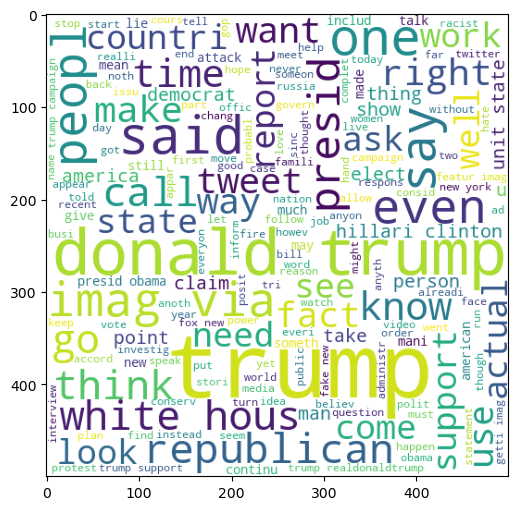

In [36]:
plt.figure(figsize=(15,6))
plt.imshow(fake_wc)

In [37]:
real_wc = wc.generate(df[df['label'] == 0]['transformed_text'].str.cat(sep=" "))

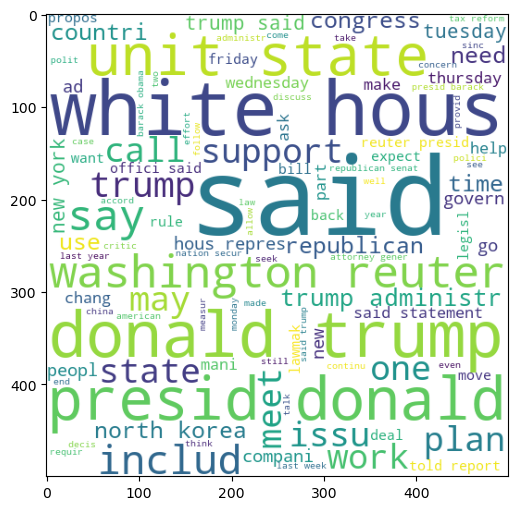

In [38]:
plt.figure(figsize=(15,6))
plt.imshow(real_wc)

In [71]:
fake_corpus=[]
for msg in df[df['label']==1]['transformed_text'].tolist():
    for word in msg.split():
        fake_corpus.append(word)

In [73]:
len(fake_corpus)

1187450

In [58]:
from collections import Counter

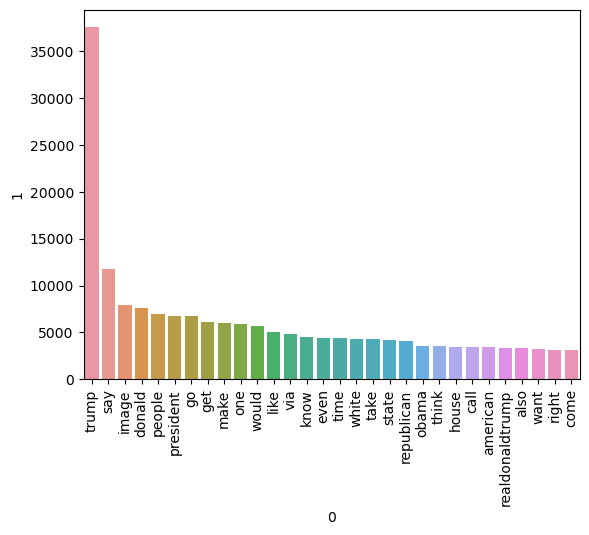

In [75]:
sns.barplot(x=pd.DataFrame(Counter(fake_corpus).most_common(30))[0],y=pd.DataFrame(Counter(fake_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
real_corpus=[]
for msg in df[df['label']==0]['transformed_text'].tolist():
    for word in msg.split():
        real_corpus.append(word)

In [56]:
len(real_corpus)

1130626

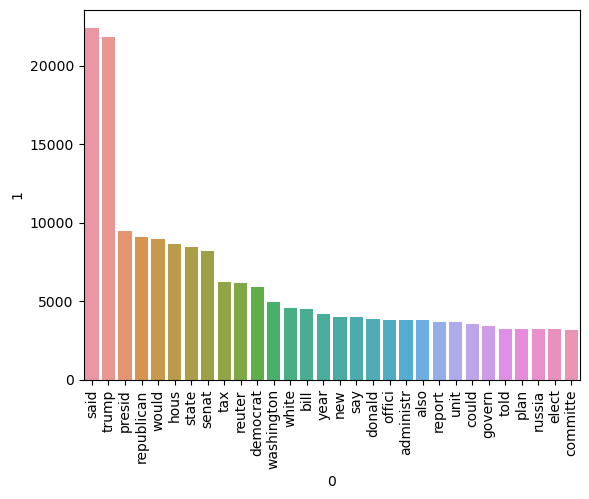

In [59]:
sns.barplot(x=pd.DataFrame(Counter(real_corpus).most_common(30))[0],y=pd.DataFrame(Counter(real_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [60]:
count_vectorizer = CountVectorizer(max_features=3000)
x = count_vectorizer.fit_transform(df['transformed_text']).toarray()  # Fit and transform


In [61]:
pickle.dump(count_vectorizer,open('count_vectorizer.pkl','wb'))

In [44]:
x.shape

(9865, 3000)

In [45]:
y = df['label'].values

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [48]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [49]:
gnb.fit(x_train,y_train)

GaussianNB()

In [50]:
y_pred1 = gnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred1))
print('confusion_matrix', confusion_matrix(y_test,y_pred1))
print('precision_score',precision_score(y_test,y_pred1))

accuracy_score 0.9457678661936137
confusion_matrix [[918  73]
 [ 34 948]]
precision_score 0.9285014691478942


In [51]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred2 = bnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred2))
print('confusion_matrix', confusion_matrix(y_test,y_pred2))
print('precision_score',precision_score(y_test,y_pred2))

accuracy_score 0.984794728839331
confusion_matrix [[975  16]
 [ 14 968]]
precision_score 0.983739837398374


In [52]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred3 = mnb.predict(x_test)
print('accuracy_score',accuracy_score(y_test,y_pred3))
print('confusion_matrix', confusion_matrix(y_test,y_pred3))
print('precision_score',precision_score(y_test,y_pred3))

accuracy_score 0.9584389254941713
confusion_matrix [[957  34]
 [ 48 934]]
precision_score 0.9648760330578512


In [53]:
pickle.dump(bnb,open('model.pkl','wb'))